In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [2]:
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/jason.xie/scikit_learn_data


In [18]:
def plot_img(img):
    plt.imshow(img.reshape(64, 64), cmap=plt.cm.gray)

def plot_side_by_side(img1, img2):
    f, axarr = plt.subplots(1, 2)
    left, right = axarr[0], axarr[1]
    left.imshow(img1.reshape(64, 64), cmap=plt.cm.gray)
    right.imshow(img2.reshape(64, 64), cmap=plt.cm.gray)

In [20]:
# plot_side_by_side(train[0], train[1])

### KMeans

1
2
3
4
5
6
7
8
9


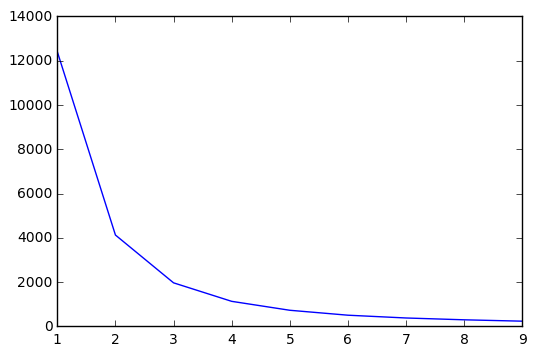

In [54]:
clusters = list(range(1, 10))
inertias = []

train_colors = train[:100,:].reshape(-1, 1)

for i in clusters:
    km = KMeans(n_clusters=i, verbose=0)
    km.fit(train_colors)
    inertias += [km.inertia_]

plt.plot(clusters, inertias)

In [68]:
km = KMeans(n_clusters=10, verbose=0)
km.fit(train_colors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

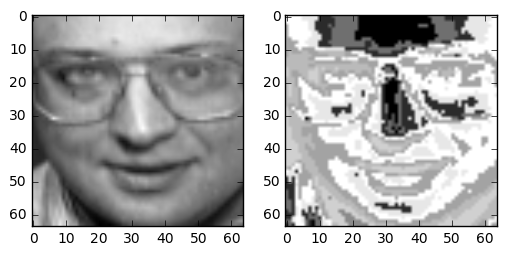

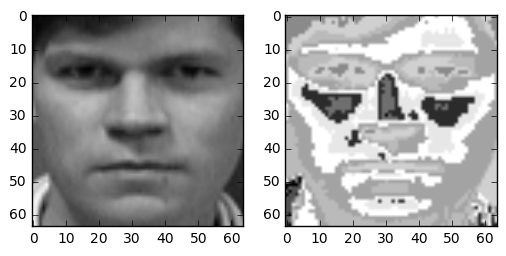

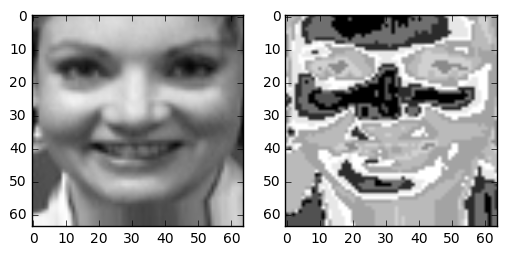

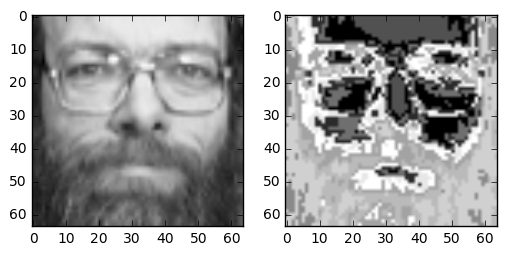

In [70]:
def transform_img(img):
    clusters = km.predict(img.reshape(-1, 1)).reshape(-1)
    return np.array([km.cluster_centers_[i-1] for i in clusters])

plot_side_by_side(test[0], transform_img(test[0]))
plot_side_by_side(test[20], transform_img(test[20]))
plot_side_by_side(test[40], transform_img(test[40]))
plot_side_by_side(test[60], transform_img(test[60]))

### GMM

In [71]:
gmm = GaussianMixture(n_components=4, covariance_type='full', verbose=3, init_params='random')
# gmm.fit(train)